In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import pandas as pd
import numpy as np

In [ ]:

# Data
data = {
    'Number UEs str': [256, 512, 1024, 2048, 4096, 8192],
    'Avg CPU (millicores)': [0.00097, 0.00103, 0.00109, 0.00115, 0.00121, 0.00127],
    'Std Dev CPU': [0.00039, 0.00041, 0.00038, 0.00040, 0.00042, 0.00044],
    'Avg Memory (MB)': [7.53, 7.57, 7.61, 7.65, 7.69, 7.73],
    'Std Dev Memory': [0.53, 0.61, 0.46, 0.50, 0.55, 0.60],
    'Total Handover Time (s)': [42, 132, 279, 1087, 837, 1004],  # Already in s from your table
    'Std Dev (Total Handover Time)': [4.2, 13.2, 27.9, 108.7, 83.7, 100.4],  # 10% of the values
    'Handover Count': [180, 241, 269, 297, 325, 353],
    'Handover Time by UE(s)': [42/256, 132/512, 279/1024, 1087/2048, 837/4096, 1004/8192],  # Total time / Number of UEs
    'Std Dev (Handover Time by UE)': [0.016, 0.025, 0.027, 0.053, 0.020, 0.012]  # Proportional std dev
}


df = pd.DataFrame(data)

df = pd.DataFrame(data)
df['Number UEs number'] = df['Number UEs str'].astype(int)

# Set seaborn style
sns.set(style="whitegrid")

CPU Fit: 0.000*x^2 + 0.000*x + 0.000
Memory Fit: 0.000*x^2 + 0.133*x + 7.210


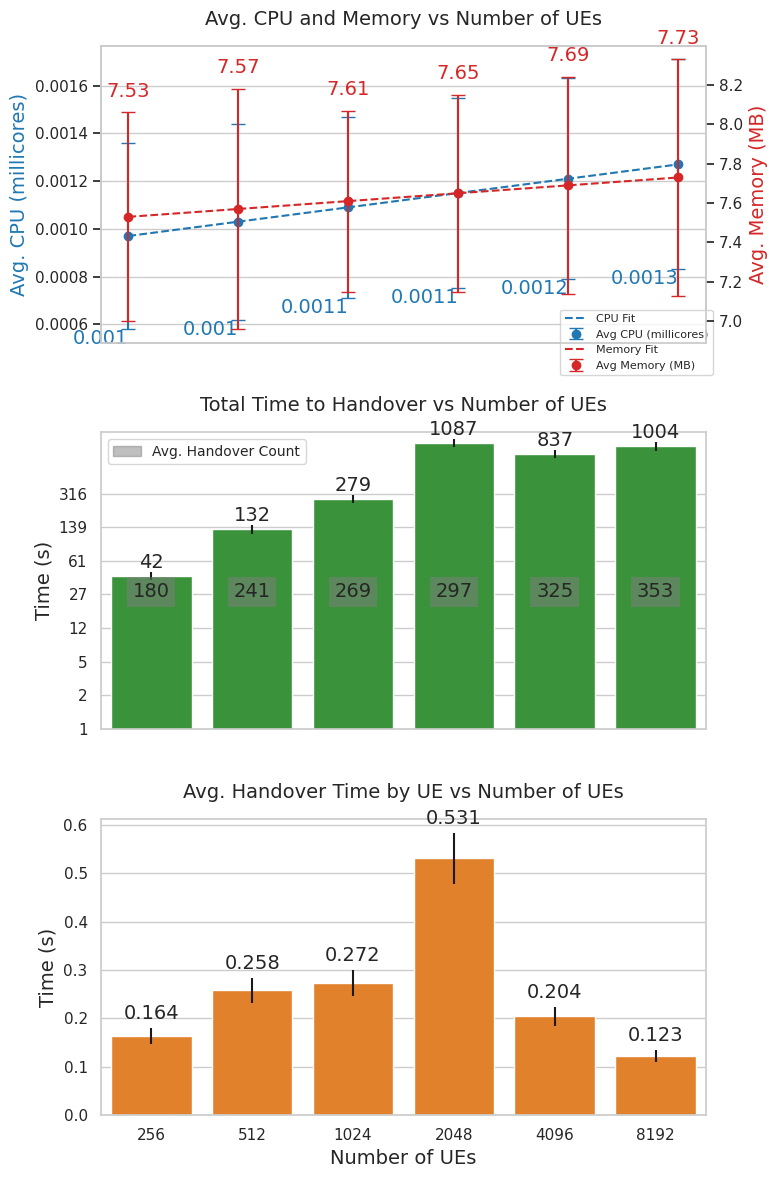

In [59]:
# Create subplots
fig, axs = plt.subplots(3, 1, figsize=(8, 12), sharex=False)
fontsize = 14
plt.rcParams.update({'font.size': fontsize})


# Line plot for Avg. CPU and Avg. Memory vs Number UEs str with two y-axes
ax1 = axs[0]
ax2 = ax1.twinx()

ax1.errorbar(df['Number UEs number'], df['Avg CPU (millicores)'], yerr=df['Std Dev CPU'], fmt='o', capsize=5, label='Avg CPU (millicores)', color='tab:blue')
ax2.errorbar(df['Number UEs number'], df['Avg Memory (MB)'], yerr=df['Std Dev Memory'], fmt='o', capsize=5, label='Avg Memory (MB)', color='tab:red')

# Fit polynomial curve
cpu_poly_coeff = np.polyfit(np.log10(df['Number UEs number']), df['Avg CPU (millicores)'], 2)
memory_poly_coeff = np.polyfit(np.log10(df['Number UEs number']), df['Avg Memory (MB)'], 2)

# Generate x values for plotting the polynomial curve
x_values = np.linspace(min(df['Number UEs number']), max(df['Number UEs number']), 500)
log_x_values = np.log10(x_values)

# Calculate y values for the polynomial curve
cpu_poly_y = np.polyval(cpu_poly_coeff, log_x_values)
memory_poly_y = np.polyval(memory_poly_coeff, log_x_values)

# Print fit equations
cpu_fit_eq = f"CPU Fit: {cpu_poly_coeff[0]:.3f}*x^2 + {cpu_poly_coeff[1]:.3f}*x + {cpu_poly_coeff[2]:.3f}"
memory_fit_eq = f"Memory Fit: {memory_poly_coeff[0]:.3f}*x^2 + {memory_poly_coeff[1]:.3f}*x + {memory_poly_coeff[2]:.3f}"

print(cpu_fit_eq)
print(memory_fit_eq)

ax1.plot(x_values, cpu_poly_y, '--', color='tab:blue', label='CPU Fit')
ax2.plot(x_values, memory_poly_y, '--', color='tab:red', label='Memory Fit')

ax1.set_title('Avg. CPU and Memory vs Number of UEs', pad=15, fontsize=fontsize)
ax1.set_xscale('log')
ax1.set_ylabel('Avg. CPU (millicores)', fontsize=fontsize)
ax2.set_ylabel('Avg. Memory (MB)', fontsize=fontsize)
axs[0].yaxis.label.set_color('tab:blue')
ax2.yaxis.label.set_color('tab:red')

# Annotate the values for Avg. CPU
for i, v in enumerate(df['Avg CPU (millicores)']):
    ax1.annotate(str(round(v, 4)), (df['Number UEs number'][i], v - df['Std Dev CPU'][i]), ha='right', va='top', color='tab:blue')

# Annotate the values for Avg. Memory
for i, v in enumerate(df['Avg Memory (MB)']):
    ax2.annotate(str(round(v, 2)), (df['Number UEs number'][i], v + df['Std Dev Memory'][i] + 0.06), ha='center', va='bottom', color='tab:red')

# Remove darkgrid style from ax2
ax2.set_facecolor('white')
ax2.grid(False)

# Remove x ticks
ax1.set_xticks([])
ax2.set_xticks([])

# Add legends
# Combine legends
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='center left', bbox_to_anchor=(0.75, 0), prop={'size': 8})
# Bar plot for Time to solve vs Number UEs
sns.barplot(x='Number UEs number', y='Total Handover Time (s)', yerr=df['Std Dev (Total Handover Time)'], data=df, ax=axs[1], color='tab:green')
axs[1].set_title('Total Time to Handover vs Number of UEs', pad=15, fontsize=fontsize)
axs[1].set_ylabel('Time (s)', fontsize=fontsize)
axs[1].set_yscale('log')
# Set more yticks for the second subplot
yticks = np.logspace(0, 2.5, num=8)
axs[1].set_yscale('log')
axs[1].set_yticks(yticks)
axs[1].set_yticklabels([f'{y:.0f}' for y in yticks])
axs[1].set_xticks([])
axs[1].set_xlabel('')


# Annotate the values of each bar
for i, v in enumerate(df['Total Handover Time (s)']):
    axs[1].annotate(str(round(v, 0)), (i, v + df['Std Dev (Total Handover Time)'][i] + 0.01), ha='center', va='bottom')

# Annotate the values of each bar
for i, v in enumerate(df['Handover Count']):
    axs[1].annotate(str(round(v, 0)), (i, min(df['Total Handover Time (s)'])-6), ha='center', va='top',
                    bbox=dict(facecolor='gray', alpha=0.5, edgecolor='none'))
annotation_patch = mpatches.Patch(color='gray', label='Avg. Handover Count', alpha=0.5)
axs[1].legend(handles=[annotation_patch], prop={'size': 10})
# Bar plot for Time by UE vs Number UEs str
sns.barplot(x='Number UEs number', y='Handover Time by UE(s)', yerr=df['Std Dev (Handover Time by UE)'], data=df, ax=axs[2], color='tab:orange')
axs[2].set_title('Avg. Handover Time by UE vs Number of UEs', pad=15, fontsize=fontsize)
axs[2].set_xlabel('Number of UEs', fontsize=fontsize)
axs[2].set_ylabel('Time (s)', fontsize=fontsize)


# Annotate the values of each bar
for i, v in enumerate(df['Handover Time by UE(s)']):
    axs[2].annotate(str(round(v, 3)), (i, v + df['Std Dev (Handover Time by UE)'][i] + 0.01), ha='center', va='bottom')

# Adjust layout
plt.tight_layout()
plt.savefig('out/xApp-handover.pdf', bbox_inches='tight')
plt.savefig('out/xApp-handover.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
# Analysis of Handover Behavior

## Key Observations:
# 1. Initial state: 56 active PCIs with UEs distributed across all cells
# 2. Non-linear scaling of handover times with peak at 2048 UEs
# 3. Performance recovery at higher UE counts (4096-8192)

# UE Distribution per PCI:
ue_per_pci = df['Number UEs number'] / 56
for i, (ues, ratio) in enumerate(zip(df['Number UEs number'], ue_per_pci)):
    print(f"{ues} UEs: {ratio:.1f} UEs/PCI - Handover Time: {df['Total Handover Time (s)'].iloc[i]}s")

# The peak at 2048 UEs (36.6 UEs/PCI) likely represents the critical density 
# where resource contention and signaling overhead are maximized before 
# optimization mechanisms kick in at
